In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data2 = pd.read_csv("hw2_data2.csv")
data2

,x1,x2
0,2.207974,2.613438
1,0.219736,-0.078950
2,-0.095382,0.513050
3,1.454725,0.188633
4,1.001916,1.303637
...,...,...
95,1.318803,0.987770
96,0.757901,2.466907
97,2.922511,2.768929
98,2.469359,2.795710


Text(0, 0.5, 'x2')

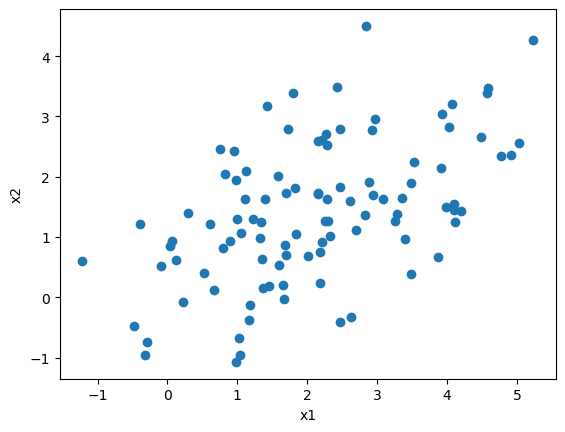

In [2]:
plt.figure()
plt.scatter(data2.iloc[:,0], data2.iloc[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')

In [3]:
# Define MultiNormal Distribution PDF
def dmultinorm(x, mu, cov):
    exponent = np.exp(-1/2*(x-mu).dot(np.linalg.inv(cov)).dot((x-mu).T))
    D = 1/np.sqrt((2 * np.pi)**len(x) * np.linalg.det(cov)) * exponent
    return D

In [4]:
mu_1  = np.array([1, 1])  # class 1 , feature's mean
mu_2  = np.array([3, 2])  # class 2 , feature's mean
cov_1 = np.array([[1, 0.3], [0.3, 1]])
cov_2 = np.array([[1, 0.15], [0.15, 1]])

L1    = np.array([[0, 1], [1, 0]])
L2    = np.array([[0, 0.1], [0.9, 0]])
L3    = np.array([[0, 0.02], [0.98, 0]])
L4    = np.array([[0, 0.9], [0.1, 0]])
L5    = np.array([[0, 0.98], [0.02, 0]])

threshold = 0.001

select_feature = ["x1", "x2"]

In [5]:
# create empty dataframe with column names & index numbers
risks = pd.DataFrame(columns=['risk1','risk2','risk3','risk4','risk5'], index=range(0,100))
probability = pd.DataFrame()
probability_1, probability_2 = [], []

# total in index shape[0] = 100, from 0 to 99
for index in range(risks.shape[0]):
    # x = [x1, x2]
    x = np.array([data2.iloc[index,0], data2.iloc[index,1]])
    
    # get p(x|Ci)
    pr_1 = dmultinorm(x, mu_1, cov_1)
    pr_2 = dmultinorm(x, mu_2, cov_2)
    
    # get value from array using .item()
    pr_all = np.array([[pr_1.item(), pr_2.item()]])
    probability_1.append(pr_1.item())
    probability_2.append(pr_2.item())
    
    # using axis=0 makes the array won't concat to one array
    risk = L1.dot(pr_all.T).T
    risk = np.append(risk, L2.dot(pr_all.T).T, axis=0)
    risk = np.append(risk, L3.dot(pr_all.T).T, axis=0)
    risk = np.append(risk, L4.dot(pr_all.T).T, axis=0)
    risk = np.append(risk, L5.dot(pr_all.T).T, axis=0)

    # determined which class
    for column in range(0, 5):
        if (risk[column, 0].item() > threshold) & (risk[column, 1].item() > threshold):
            risks.iloc[index, column] = "undetermined"
        elif (risk[column, 0].item() > risk[column, 1].item()):
            risks.iloc[index, column] = "class2"
        elif (risk[column, 0].item() < risk[column, 1].item()):
            risks.iloc[index, column] = "class1"

probability.loc[:, "probability 1"] = probability_1
probability.loc[:, "probability 2"] = probability_2

dataset = pd.concat([data2, probability, risks], axis=1)
dataset

,x1,x2,probability 1,probability 2,risk1,risk2,risk3,risk4,risk5
0,2.207974,2.613438,0.034038,0.089420,undetermined,undetermined,undetermined,undetermined,class2
1,0.219736,-0.078950,0.083132,0.000822,class1,class1,class1,class1,class1
2,-0.095382,0.513050,0.090317,0.000783,class1,class1,class1,class1,class1
3,1.454725,0.188633,0.091843,0.013614,undetermined,undetermined,class1,undetermined,undetermined
4,1.001916,1.303637,0.158629,0.020178,undetermined,undetermined,class1,undetermined,undetermined
...,...,...,...,...,...,...,...,...,...
95,1.318803,0.987770,0.157563,0.029153,undetermined,undetermined,class1,undetermined,undetermined
96,0.757901,2.466907,0.044055,0.009372,undetermined,class1,class1,undetermined,class2
97,2.922511,2.768929,0.012038,0.117520,undetermined,undetermined,undetermined,undetermined,class2
98,2.469359,2.795710,0.020674,0.094497,undetermined,undetermined,undetermined,undetermined,class2


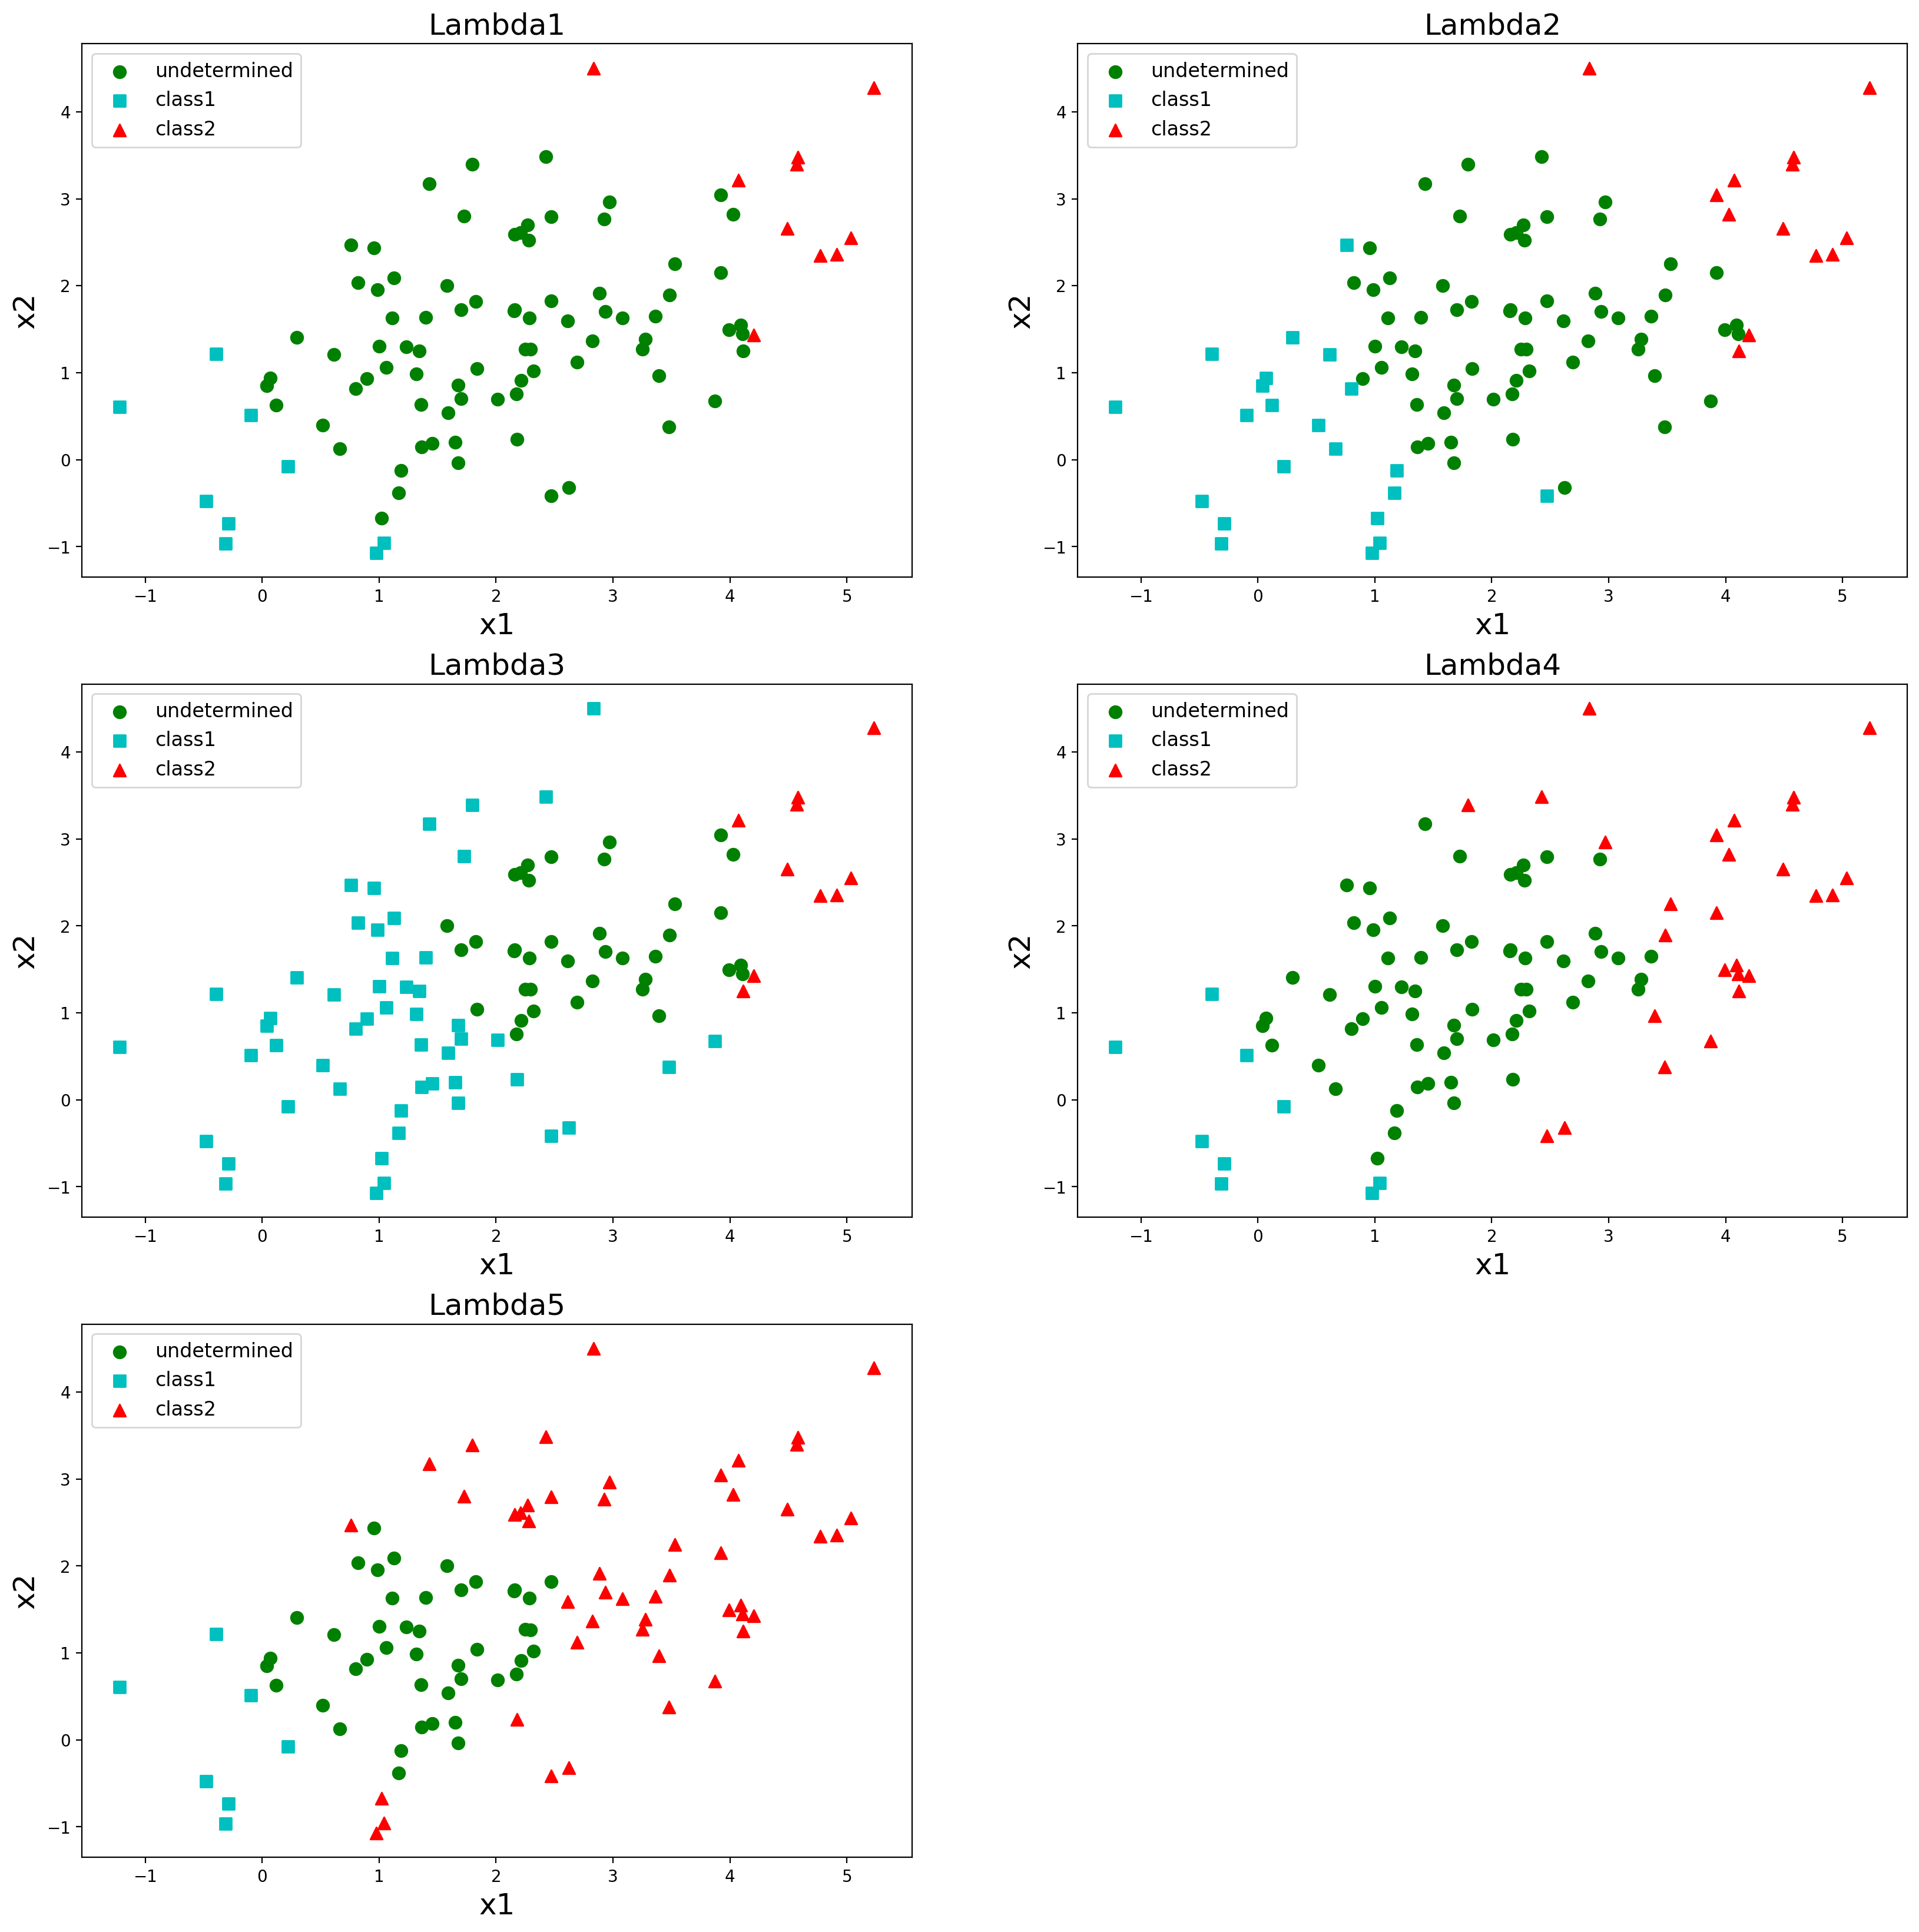

In [20]:
plt.figure(figsize = (20, 20), dpi=200)
for pic in range(4, 9):
    plt.subplot(3, 2, pic-3)
    plt.scatter(dataset.iloc[(dataset.iloc[:, pic] == 'undetermined').values, 0], 
                dataset.iloc[(dataset.iloc[:, pic] == 'undetermined').values, 1],
                s=55, c='g', marker='o', label='undetermined')
    plt.scatter(dataset.iloc[(dataset.iloc[:, pic] == 'class1').values, 0], 
                dataset.iloc[(dataset.iloc[:, pic] == 'class1').values, 1],
                s=55, c='c', marker='s', label='class1')
    plt.scatter(dataset.iloc[(dataset.iloc[:, pic] == 'class2').values, 0], 
                dataset.iloc[(dataset.iloc[:, pic] == 'class2').values, 1],
                s=55, c='r', marker='^', label='class2')
    plt.xlabel('x1', fontsize = 18)
    plt.ylabel('x2', fontsize = 18)
    plt.title(f'Lambda{pic-3}', fontsize = 18)
    plt.legend(fontsize = 12)